# In Class Activity - Spotify Database - SQL Practice

Instructor: Melissa Laurino</br>
Spring 2025</br>

Name: Thompson Morgan
</br>
Date: 2/27/25
<br>
<br>

In [4]:
# Load necessary packages:
from sqlalchemy import create_engine, inspect, text # Database navigation
import sqlite3 # A second option for working with databases
import pandas as pd # Python data manilpulation

In [5]:
# Set working directory (If needed)
#import os
#os.chdir('')

In [6]:
# Print the columns in the database:

In [7]:
# Create a SQLite database and engine
db_file = "spotify_data.db"
engine = create_engine(f"sqlite:///{db_file}")

In [8]:
# Inspect the database to list the fields
inspector = inspect(engine)
columns = inspector.get_columns("spotify_history")

# Print column names
print("Columns in spotify_history table:")
for col in columns:
    print(col["name"], "-", col["type"])

Columns in spotify_history table:
ts - TEXT
platform - TEXT
ms_played - BIGINT
conn_country - TEXT
ip_addr - TEXT
master_metadata_track_name - TEXT
master_metadata_album_artist_name - TEXT
master_metadata_album_album_name - TEXT
spotify_track_uri - TEXT
episode_name - FLOAT
episode_show_name - FLOAT
spotify_episode_uri - FLOAT
audiobook_title - FLOAT
audiobook_uri - FLOAT
audiobook_chapter_uri - FLOAT
audiobook_chapter_title - FLOAT
reason_start - TEXT
reason_end - TEXT
shuffle - BOOLEAN
skipped - BOOLEAN
offline - BOOLEAN
offline_timestamp - FLOAT
incognito_mode - BOOLEAN
year - BIGINT


For practice, there are not multiple tables in this database. There is only one table named spotify_history.

Metadata for this database can be found here: https://github.com/MelissaLaurino/SpotifyStreamingHistory

We can use COUNT( * ) to summarize and count occurrences in SQL. Use COUNT( * ) below:

Query 1: <br>
Find the top 30 artists listened to in the year 2024.

In [13]:
# Select the master_metadata_album_artist_name and the count(*) as play_count from the table spotify_history where the year is 2024, then
# group by the master_metadata_album_artist_name and order by play_count in descending order with a limit of 30

with engine.connect() as connection:   # Establish a connection
    query = text("""SELECT master_metadata_album_artist_name, COUNT(*) AS play_count
                    FROM spotify_history
                    WHERE year = 2024
                    GROUP BY master_metadata_album_artist_name
                    ORDER BY play_count DESC
                    LIMIT 30;
                    """) # Define the query
    query_one = pd.read_sql(query, connection) # Use pandas to read the sql query with the connection to the database

# Print the results
query_one

,master_metadata_album_artist_name,play_count
0,Miley Cyrus,680
1,Ariana Grande,583
2,Hozier,512
3,Eminem,454
4,Sabrina Carpenter,444
5,Lady Gaga,326
6,Billie Eilish,284
7,Noah Cyrus,282
8,Amy Winehouse,266
9,Teddy Swims,257


Query 2: <br>
Find the top 30 songs listened to in the year 2017.

In [15]:
# Select the master_metadata_track_name and the count(*) as play_count from the table spotify_history where the year is 2017, then group by 
# the master_metadata_track_name and order by play_count in descending order with a limit of 30

with engine.connect() as connection:   # Establish a connection
    query = text("""SELECT master_metadata_track_name, COUNT(*) AS play_count
                    FROM spotify_history
                    WHERE year = 2017
                    GROUP BY master_metadata_track_name
                    ORDER BY play_count DESC
                    LIMIT 30;
                    """) # Define the query
    query_two = pd.read_sql(query, connection) # Use pandas to read the sql query with the connection to the database

# Print the results
query_two

,master_metadata_track_name,play_count
0,Malibu,223
1,Close,150
2,Shape of You,147
3,It Ain’t Me (with Selena Gomez),117
4,Take Me Down,95
5,Rainbow,95
6,Havana (feat. Young Thug),95
7,Week Without You,88
8,Anyway,86
9,Love Someone,82


Query 3: <br>
Ask a question and create your own! 

Find the top 30 songs listened to during a private session.

In [18]:
# Select the master_metadata_track_name and count(*) as play_count from the table spotify_history where incognito_mode is true, then 
# group by the master_metadata_track_name and order by play_count in descending order with a limit of 30

with engine.connect() as connection:   # Establish a connection
    query = text("""SELECT master_metadata_track_name, COUNT(*) AS play_count
                    FROM spotify_history
                    WHERE incognito_mode = TRUE
                    GROUP BY master_metadata_track_name
                    ORDER BY play_count DESC
                    LIMIT 30;
                    """) # Define the query
    query_three = pd.read_sql(query, connection) # Use pandas to read the sql query with the connection to the database

# Print the results
query_three

,master_metadata_track_name,play_count
0,Meet Me At Our Spot,13
1,Where Are You Now,5
2,Before You Go,4
3,Woman,3
4,Thnks fr th Mmrs,3
5,Sangria Wine,3
6,Pepas,3
7,Monsters (feat. Demi Lovato and blackbear),3
8,Easy On Me,3
9,exile (feat. Bon Iver),2


In [19]:
#Disconnect from the database. Always remember to disconnect :) 
connection.close()

# Assignment #5 - Data Gathering and Warehousing - DSSA-5102

<b>Only Murders in the...Database?</b><br>
An introduction to navigating SQL databases using SQL, Python and Jupyter Notebook. <br>
<br>
Congrats! You have solved the murder from Assignment #4, let's practice more queries in SQL City! <br>
<br>
Your task for <b>Assignment #5</b> is to complete the following objectives:<br>
You are a data scientist that was hired by SQL City. Your objectives are as follows:<br>
- Objective 1: The town is willing to fund more training for officers in SQL City based on the type of crime that is most committed. The training would help them identify the clues that indicate these two types upon arrival on a crime scene. As a data scientist, what crime type would you advise needs more training for officers in SQL city? What crime was committed the most in SQL City within the database date range? Save your query as a dataframe and quickly add a bar graph visual to support your recommendation.<br>
- Objective 2: The town has also received more funding to encourage DOUBLE overtime for officers in SQL City during the month with the highest crime rate throughout the date range of the database. What month would you advise the town to encourage officer overtime? <br>
- Objective 3: To thank the officers for their extra training and overtime, the town will pay for their monthly gym membership. They want to give the officers the membership that the least amount of civilians have to avoid being recognized daily as the town heroes. The membership can be used in any town. What membership does the town give them?<br><br>
<b>--</b>Add detailed comments to explain EVERY query or SQL command you use while we are still learning and practicing. I have my steps outlined, but please add more cells inbetween for additional queries! There is no limit on the number of queries you can use. <br>
<b>--</b>For each query include comments such as "SELECT all records FROM table WHERE column name = X"<br>
<b>--</b>Answer the prompts in markdown cells. Justify your response. A simple yes/no answer will receive no credit.<br>

Recommended Readings: Chapters 4-7 in Getting Started with SQL by Thomas Nield<br><br>

SQL Dictionary: https://www.w3schools.com/sql/sql_ref_join.asp

This fabulous database was created by @NUKnightLab on Github and can be found here: https://github.com/NUKnightLab/sql-mysteries


In [21]:
# Load necessary libraries
from sqlalchemy import create_engine, inspect, text # Database navigation
import sqlite3 # A second option for working with databases
import pandas as pd # Python data manilpulation
import matplotlib.pyplot as plt # For graphing

In [22]:
# Connect to our .db file
db_path = "sql-murder-mystery.db"  # Change this to your actual file name
engine = create_engine(f"sqlite:///{db_path}") # Use the create_engine function to connect to the database

# Initializing the inspector command
inspector = inspect(engine)

In [23]:
# For a quick reference for tables and columns, refer to schema on Blackboard, or list the tables and fields below:
tables = inspector.get_table_names() # Get all table names from the database
print("Tables in the database:", tables) # Print all table names

# Print all tables, fields, and data types
print("\nTables and Fields in the database:")
for table_name in inspector.get_table_names():
   for column in inspector.get_columns(table_name):
       print("Table: " + table_name + ", Column: " + column['name'] + ", Type: ", column['type'])

Tables in the database: ['crime_scene_report', 'drivers_license', 'facebook_event_checkin', 'get_fit_now_check_in', 'get_fit_now_member', 'income', 'interview', 'person', 'solution']

Tables and Fields in the database:
Table: crime_scene_report, Column: date, Type:  INTEGER
Table: crime_scene_report, Column: type, Type:  TEXT
Table: crime_scene_report, Column: description, Type:  TEXT
Table: crime_scene_report, Column: city, Type:  TEXT
Table: drivers_license, Column: id, Type:  INTEGER
Table: drivers_license, Column: age, Type:  INTEGER
Table: drivers_license, Column: height, Type:  INTEGER
Table: drivers_license, Column: eye_color, Type:  TEXT
Table: drivers_license, Column: hair_color, Type:  TEXT
Table: drivers_license, Column: gender, Type:  TEXT
Table: drivers_license, Column: plate_number, Type:  TEXT
Table: drivers_license, Column: car_make, Type:  TEXT
Table: drivers_license, Column: car_model, Type:  TEXT
Table: facebook_event_checkin, Column: person_id, Type:  INTEGER
Table:

We can use the COUNT command to explore our queries further. COUNT will count the number of records that meet the specified criteria.
Additional examples using COUNT: https://www.w3schools.com/sql/sql_count.asp

In [25]:
# Practice analyzing COUNTS in data tables with SQL queries:
# Brainstorming for Objective 1
# We can find the top ten cities within our Murder Mystery database that had the most crimes by using the COUNT SQL command.
# SELECT the cities that have the most counts within the table crime_scene_report and
# GROUP the results BY city and ORDER BY a DESC count, only show a limit of 10 records:

with engine.connect() as connection:   # Establish a connection
    query = text("""SELECT city, COUNT(*) AS count
                    FROM crime_scene_report
                    GROUP BY city
                    ORDER BY count DESC
                    LIMIT 10""") # Define the query
    practice_query = pd.read_sql(query, connection) # Use pandas to read the sql query with the connection to the database

# Print the results
practice_query

,city,count
0,SQL City,9
1,Murfreesboro,9
2,Toledo,8
3,Jersey City,8
4,Evansville,8
5,Duluth,8
6,Wilmington,7
7,Waterbury,7
8,Reno,7
9,Portsmouth,7


<b>Objective 1:</b> The town is willing to fund more training for officers in SQL City based on the type of crime that is most committed. The training would help them identify the clues that indicate these two types upon arrival on a crime scene. As a data scientist, what crime type would you advise needs more training for officers in SQL city? What crime was committed the most in SQL City within the database date range? Save your query as a dataframe and quickly add a bar graph visual to support your recommendation.

In [27]:
# Select the type and count(*) as count from the table crime_scene_report where the city is SQL City, then group by type and order by count
# in descending order

with engine.connect() as connection:   # Establish a connection
    query = text("""SELECT type, COUNT(*) AS count
                    FROM crime_scene_report
                    WHERE city = 'SQL City'
                    GROUP BY type
                    ORDER BY count DESC
                    """) # Define the query
    first = pd.read_sql(query, connection) # Use pandas to read the sql query with the connection to the database 

# Print the results
first

,type,count
0,murder,3
1,assault,2
2,theft,1
3,robbery,1
4,bribery,1
5,arson,1


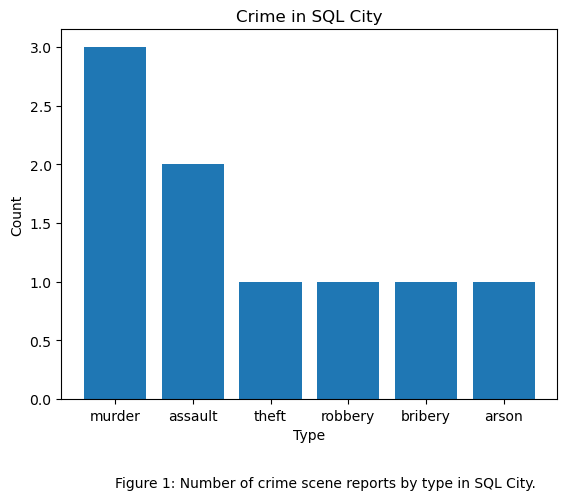

In [28]:
# Graph your results:
plt.bar(first['type'], first['count']) # Create a bar graph with the 'type' column as the x-axis and 'count' column as the y-axis
plt.xlabel("Type") # Label x-axis
plt.ylabel("Count") # Label y-axis
plt.title("Crime in SQL City") # Add a title
plt.text(0, -0.75, "Figure 1: Number of crime scene reports by type in SQL City.") # Add a caption
plt.show() # Show the graph

Answer: <b>Murder</b> was committed the most in SQL City, followed by <b>assault</b>.

<b>Objective 2:</b> The town has also received more funding to encourage DOUBLE overtime for officers in SQL City during the month with the highest crime rate throughout the date range of the database. What month would you advise the town to encourage officer overtime?

In [31]:
# Select the date and count(*) as count from the table crime_scene_report where the city is SQL City, then group by date and order by count
# in descending order

with engine.connect() as connection:   # Establish a connection
    query = text("""SELECT date, COUNT(*) AS count
                    FROM crime_scene_report
                    WHERE city = 'SQL City'
                    GROUP BY date
                    ORDER BY count DESC
                    """) # Define the query
    second = pd.read_sql(query, connection) # Use pandas to read the sql query with the connection to the database 

# Print the results
second

,date,count
0,20180115,3
1,20180215,2
2,20180103,1
3,20171110,1
4,20170820,1
5,20170712,1


After inspecting the data frame, the total crime counts by month are: <br>
January: <b>4</b> <br>
February: <b>2</b> <br>
November: <b>1</b> <br>
July: <b>1</b> <br>
August: <b>1</b> <br>

Answer: <b>January</b> had the most crimes, with a total of 4.

<b>Objective 3:</b> To thank the officers for their extra training and overtime, the town will pay for their monthly gym membership. They want to give the officers the membership that the least amount of civilians have to avoid being recognized daily as the town heroes. The membership can be used in any town. What membership does the town give them?

In [35]:
# Select the membership_status and count(*) as count from the table get_fit_now_member, then group by membership_status and order by count

with engine.connect() as connection:   # Establish a connection
    query = text("""SELECT membership_status, COUNT(*) AS count
                    FROM get_fit_now_member
                    GROUP BY membership_status
                    ORDER BY count
                    """) # Define the query
    third = pd.read_sql(query, connection) # Use pandas to read the sql query with the connection to the database 

# Print the results
third

,membership_status,count
0,regular,53
1,silver,63
2,gold,68


Answer: The <b>regular</b> membership has the lowest subscription count.

In [37]:
# Disconnect from the database. Always remember to disconnect :) 
connection.close()